<a href="https://colab.research.google.com/github/JoiceJesus/Redes-Neurais/blob/main/RedesNeuraiscomTensorfloweKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//Joice de Jesus  2021.1

Atividade 3 Inteligência Artificial

In [8]:
#Carregando Dados para utilizar na rede
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
dataset.head(10) 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [10]:
#conjunto de estatísticas descritivas dessas duas variáveis: a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
#Escolho os meus atributos nesse caso idade e salario
X = dataset.loc[:,['Age','EstimatedSalary']].values
y = dataset['Purchased'].values

print(X[0:6,:])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]
 [   27 58000]]


In [13]:
#separo entre conjuntos de treinamento ou conjuntos de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
#Parte da Normalização dos Dados
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [15]:
#Agora os primeiros passos para procequir para o treinamento da rede
import tensorflow as tf

# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [17]:
# Montando a Rede
#Otimização -> Adam: SGD com taxa de aprendizagem adaptativa e momento (Kingma, Diederick & Jimmy, 2014)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
#Treinando teremos o total de 81 épocas, ou seja o backpropagation sera executado 81 vezes.
classifier.fit(X_train, y_train, batch_size = 1, epochs = 81)

Epoch 1/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.6200
Epoch 2/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6794 - accuracy: 0.6300
Epoch 3/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6712 - accuracy: 0.6300
Epoch 4/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6640 - accuracy: 0.6300
Epoch 5/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6574 - accuracy: 0.6300
Epoch 6/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6503 - accuracy: 0.6300
Epoch 7/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6429 - accuracy: 0.6300
Epoch 8/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6356 - accuracy: 0.6300
Epoch 9/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.6300
Epoch 10/81
300/300 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.6300

In [19]:
#Agora avaliamos o nosso modelo
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

4/4 [==============================] - 0s 3ms/step
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[[0.12846386]
 [0.17854467]
 [0.2173465 ]
 [0.1001509 ]
 [0.10348107]
 [0.00738886]
 [0.01431407]
 [0.7813001 ]
 [0.00597956]
 [0.53161204]
 [0.03736036]
 [0.03046336]
 [0.17341487]
 [0.40924045]
 [0.01696705]
 [0.39194083]
 [0.312376  ]
 [0.01331512]
 [0.7813001 ]
 [0.04139112]
 [0.09410752]
 [0.7813001 ]
 [0.29770958]
 [0.7813001 ]
 [0.00422172]
 [0.7813001 ]
 [0.08814176]
 [0.08538011]
 [0.21151884]
 [0.178316  ]
 [0.02235339]
 [0.32765734]
 [0.7813001 ]
 [0.16357702]
 [0.01479154]]


In [20]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [21]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [22]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [23]:
from sklearn.metrics import accuracy_score

print("Acurácia/Desempenho: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia/Desempenho:  89.0 %


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[64  4]
 [ 7 25]]


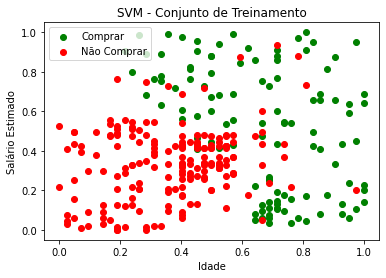

In [27]:
#Visualização dos Dados
import matplotlib.pyplot as plt

# Seleção dos elementos que foram classificados como negativos (não compra)
age_neg = X_train[y_train == 0, 0]
salary_neg = X_train[y_train == 0, 1]
age_pos = X_train[y_train == 1, 0]
salary_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,salary_pos, color='green', label = 'Comprar')
plt.scatter(age_neg,salary_neg, color='red', label = 'Não Comprar')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

76/76 [==============================] - 0s 5ms/step


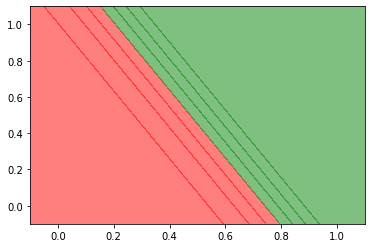

In [29]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('red','green')))

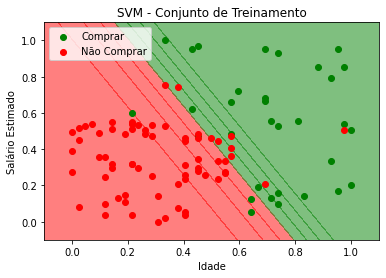

In [31]:
age_neg = X_test[y_test == 0, 0]
salary_neg = X_test[y_test == 0, 1]
age_pos = X_test[y_test == 1, 0]
salary_pos = X_test[y_test == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('red','green')))

plt.scatter(age_pos,salary_pos, color='green', label = 'Comprar')
plt.scatter(age_neg,salary_neg, color='red', label = 'Não Comprar')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

In [32]:
y_pred_mesh[30:35,40:45]

array([[0.7813001, 0.7813001, 0.7813001, 0.7813001, 0.7813001],
       [0.7813001, 0.7813001, 0.7813001, 0.7813001, 0.7813001],
       [0.7813001, 0.7813001, 0.7813001, 0.7813001, 0.7813001],
       [0.7813001, 0.7813001, 0.7813001, 0.7813001, 0.7813001],
       [0.7813001, 0.7813001, 0.7813001, 0.7813001, 0.7813001]],
      dtype=float32)